In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
def compute_cost(X, y, w, b):
    m = len(y)
    cost = 0

    for i in range(m):
        prediction = np.dot(w, X[i]) + b
        cost += (prediction - y[i])**2

    return cost / (2 * m)

In [26]:
def compute_gradient(X, y, w, b):
    m = len(y)
    dj_dw = dj_dw = np.zeros(len(w))

    dj_db = 0

    for i in range(m):
        prediction = np.dot(w, X[i]) + b
        error = prediction - y[i]

        for j in range(len(w)):
            dj_dw[j] = dj_dw[j] + error * X[i][j]

        dj_db = dj_db + error

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [58]:
def gradient_descent(X, y, w, b, alpha, steps):
    for step in range(steps):
        dj_dw, dj_db = compute_gradient(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = compute_cost(X, y, w, b)
        if step % 100 == 0:
            print(f"Iteration {step}: Cost = {cost}")

    return w, b


In [51]:
data = pd.read_csv(r"C:\Users\Pratheek\Documents\RNC Codes\Task 8\insurance.csv")
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [52]:
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

data['region'] = data['region'].map({
    'southwest': 0,
    'southeast': 1,
    'northwest': 2,
    'northeast': 3
})


In [53]:
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].values
y = data['expenses'].values

m = len(y)

In [54]:
X_train = X[:1300]
y_train = y[:1300]

X_test = X[1300:]
y_test = y[1300:]

In [68]:
mu = X_train.mean(axis=0)
sigma = X_train.std(axis=0)
sigma[sigma == 0] = 1

X_train = (X_train - mu) / sigma
X_test  = (X_test - mu) / sigma

In [76]:
w = np.zeros(X_train.shape[1])
b = 0

alpha = 0.01
steps = 2000


In [77]:
y_train = y_train / 1000
y_test  = y_test / 1000

In [78]:
w, b = gradient_descent(X_train, y_train, w, b, alpha, steps)

print("Training completed")
print("Final weights:", w)
print("Final bias:", b)

Iteration 0: Cost = 0.00015649514666010286
Iteration 100: Cost = 3.646041641868596e-05
Iteration 200: Cost = 2.0377416473697493e-05
Iteration 300: Cost = 1.819662685053774e-05
Iteration 400: Cost = 1.7897854342215555e-05
Iteration 500: Cost = 1.7856545413302544e-05
Iteration 600: Cost = 1.7850786043692904e-05
Iteration 700: Cost = 1.7849976764984658e-05
Iteration 800: Cost = 1.7849862198687573e-05
Iteration 900: Cost = 1.7849845862635832e-05
Iteration 1000: Cost = 1.7849843516802568e-05
Iteration 1100: Cost = 1.7849843177604267e-05
Iteration 1200: Cost = 1.784984312822191e-05
Iteration 1300: Cost = 1.7849843120984037e-05
Iteration 1400: Cost = 1.7849843119916132e-05
Iteration 1500: Cost = 1.7849843119757524e-05
Iteration 1600: Cost = 1.7849843119733847e-05
Iteration 1700: Cost = 1.784984311973028e-05
Iteration 1800: Cost = 1.7849843119729693e-05
Iteration 1900: Cost = 1.784984311972963e-05
Training completed
Final weights: [ 3.64363464e-03 -5.34687082e-05  2.04212729e-03  5.86939982e-0

In [79]:
print("\nEnter details to predict insurance expense:")

age = float(input("Age: "))
sex = input("Sex (male/female): ")
bmi = float(input("BMI: "))
children = int(input("Number of children: "))
smoker = input("Smoker (yes/no): ")
region = input("Region (southwest/southeast/northwest/northeast): ")


Enter details to predict insurance expense:


Age:  21
Sex (male/female):  male
BMI:  24
Number of children:  2
Smoker (yes/no):  no
Region (southwest/southeast/northwest/northeast):  southwest


In [80]:
sex = 1 if sex == "male" else 0
smoker = 1 if smoker == "yes" else 0

region_map = {
    'southwest': 0,
    'southeast': 1,
    'northwest': 2,
    'northeast': 3
}
region = region_map[region]


In [81]:
user_X = np.array([age, sex, bmi, children, smoker, region])
predicted_expense = np.dot(w, user_X) + b

print("\nPredicted Insurance Expense:", predicted_expense)


Predicted Insurance Expense: 0.1398431403915649


In [82]:
y_pred_train = np.dot(X_train, w) + b
ages_train = data.iloc[:1300]['age']


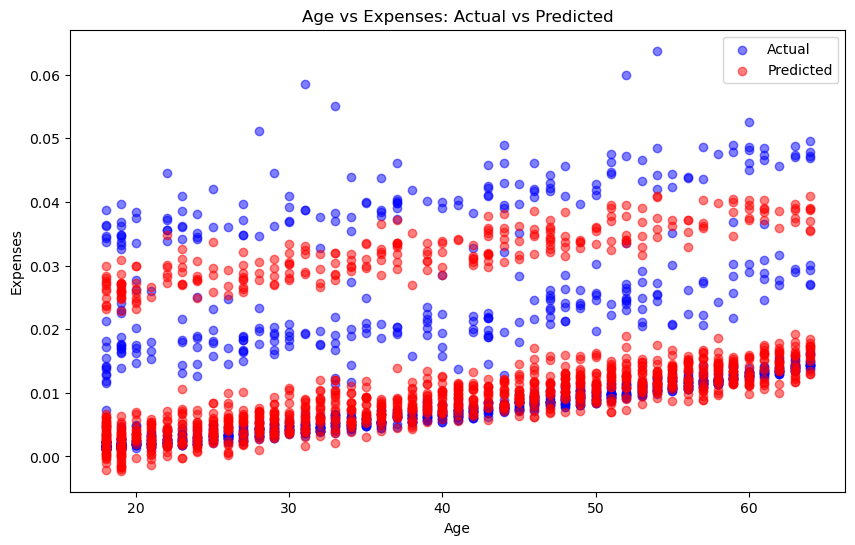

In [83]:
plt.figure(figsize=(10, 6))

plt.scatter(
    ages_train,
    y_train,
    color='blue',
    alpha=0.5,
    label='Actual'
)

plt.scatter(
    ages_train,
    y_pred_train,
    color='red',
    alpha=0.5,
    label='Predicted'
)

plt.xlabel("Age")
plt.ylabel("Expenses")
plt.title("Age vs Expenses: Actual vs Predicted")
plt.legend()
plt.show()